In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [2]:
# Mean of the N-dimensional distribution.
centre_1 = (1,1) 
centre_2 = (3,2)

In [3]:
# Covariance matrix of the distribution.
cov_narrow = [[1, 0], [0, 1]] 
cov_wide = [[1, 0], [0, 100]]

In [4]:
# Draw random samples from a multivariate Narrow and Wide distribution.
data_set_t = numpy.random.multivariate_normal(centre_1, cov_narrow, 200),numpy.random.multivariate_normal(centre_2, cov_wide, 200)
# Convert the tuple list to a array with two dimension.
data_set = list(data_set_t[0]) 
for i in data_set_t[1]:
    data_set.append(i)
data_set = numpy.array(data_set)

In [5]:
# Produce label for the dataset.
y_n = numpy.empty(200)
y_n.fill(0)
y_w = numpy.empty(200)
y_w.fill(1)
y = list(y_n)
for i in y_w:
    y.append(i)
y = numpy.array(y, dtype=int)

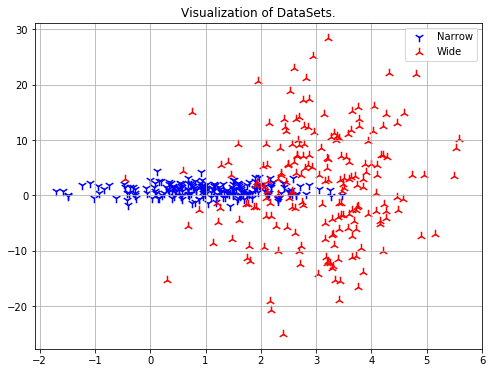

In [6]:
# Plot the data (classes indicated by color) in two plots (for narrow and wide).
plt.figure(figsize=(8, 6))
plt.scatter(data_set[:200, 0], data_set[:200, 1], s=90, color='b', label='Narrow', marker='1')        
plt.scatter(data_set[200:400,0], data_set[200:400,1], s=90, color='r', label='Wide', marker='2')        
plt.title('Visualization of DataSets.')
plt.grid()
plt.legend()
plt.show()

3- Implement

In [7]:
# Perceptron classifer.
class Perceptron(object): 
    def __init__(self, alpha=0.0001, epochs=10):
        self.alpha = alpha
        self.epochs = epochs
    def train(self, X, y):
        self.w = numpy.zeros(1 + X.shape[1])
        self.cost_ = []
        for _ in range(self.epochs):
            cost = 0
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))
                self.w[1:] +=  update * xi
                self.w[0] +=  update
                cost += int(update != 0.0)
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return numpy.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return numpy.where(self.net_input(X) >= 0.0, 1, -1)

In [8]:
# Call the Perceptron class.
perceptron = Perceptron(alpha=0.01, epochs=10).train(data_set, y)

In [9]:
print('Weights: %s' % perceptron.w)

Weights: [ 0.34        0.89359412 -0.14830237]


In [10]:
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('x', 'o')
    colors = ('b', 'r','w')
    cmap = ListedColormap(colors[:3])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min, x1_max, resolution),
                              numpy.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(numpy.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(numpy.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

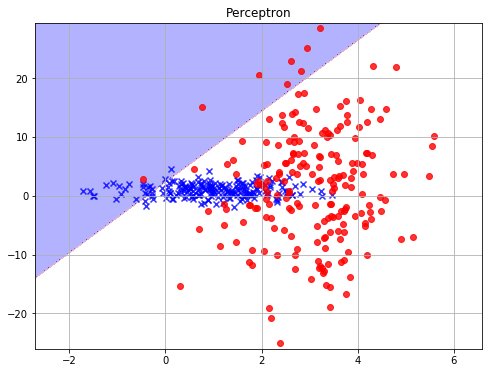

In [11]:
plt.figure(figsize=(8, 6))
plot_decision_regions(data_set, y, classifier=perceptron)
plt.title('Perceptron')
plt.grid()
plt.show()

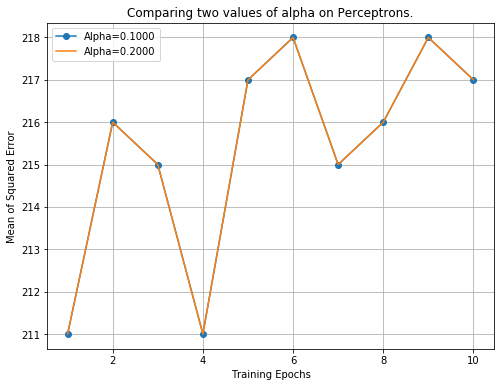

In [12]:
plt.figure(figsize=(8,6))
marker = ['o', '']
for i in range(2):   
    alpha_ = (i+1)/10
    Pt= Perceptron(alpha=alpha_)
    Pt.train(data_set, y)
    plt.plot(range(1, len(Pt.cost_)+1), Pt.cost_, marker=marker[i], label="Alpha=%.4f"%(alpha_))
    plt.legend(loc='best')
plt.xlabel('Training Epochs'), plt.ylabel('Mean of Squared Error')
plt.title('Comparing two values of alpha on Perceptrons.')
plt.grid()
plt.show()

In [13]:
class stochastic_gradient_descent(object):

    def __init__(self, alpha, epochs):
        self.alpha = alpha
        self.epochs = epochs

    def train(self, X, y):

        self.w = numpy.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w[1:] += self.alpha * X.T.dot(errors)
            self.w[0] += self.alpha * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return numpy.dot(X, self.w[1:]) + self.w[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return numpy.where(self.activation(X) >= 0.0, 1, -1)

4- Train the perceptron on each of the data sets, and experiment with different values for alpha.

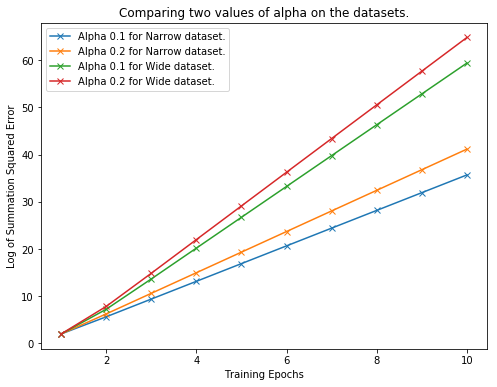

In [14]:
# Plot different behavior of two values of alpha for wide and narrow data.
name_dataset = ['Narrow', 'Wide']
plt.figure(figsize=(8,6))
for j in range(2):
    for i in range(2): 
        alpha_ = (i+1)/10
        Adaptive_Linear_Neuron = stochastic_gradient_descent(epochs=10, alpha=alpha_)
        Adaptive_Linear_Neuron.train(data_set_t[j], y[200])
        plt.plot(range(1, len(Adaptive_Linear_Neuron.cost_)+1),
                 numpy.log10(Adaptive_Linear_Neuron.cost_),marker='x',
                 label="Alpha %.1f for %s dataset."%(alpha_, name_dataset[j]))
        plt.xlabel('Training Epochs'), plt.ylabel('Log of Summation Squared Error')
        plt.title('Comparing two values of alpha on the datasets.')
        plt.grid()
        plt.legend(loc='best')
plt.show()

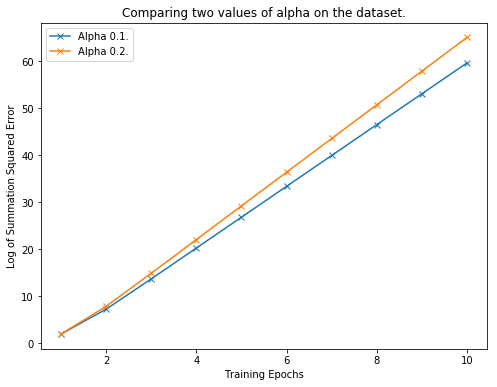

In [15]:
# Plot different behavior of two values of alpha on totall dataset.
name_dataset = ['Narrow', 'Wide']
Yy= [y_n, y_w]
plt.figure(figsize=(8,6))
for i in range(2): 
    alpha_ = (i+1)/10
    Adaptive_Linear_Neuron = stochastic_gradient_descent(epochs=10, alpha=alpha_)
    Adaptive_Linear_Neuron.train(data_set, y)
    plt.plot(range(1, len(Adaptive_Linear_Neuron.cost_)+1),
             numpy.log10(Adaptive_Linear_Neuron.cost_),marker='x',
             label="Alpha %.1f."%(alpha_))
    plt.xlabel('Training Epochs'), plt.ylabel('Log of Summation Squared Error')
    plt.title('Comparing two values of alpha on the dataset.')
    plt.grid()
    plt.legend(loc='best')
plt.show()

In [16]:
# standardize features
X_std = numpy.copy(data_set)
X_std[:,0] = (data_set[:,0] - data_set[:,0].mean()) / data_set[:,0].std()
X_std[:,1] = (data_set[:,1] - data_set[:,1].mean()) / data_set[:,1].std()

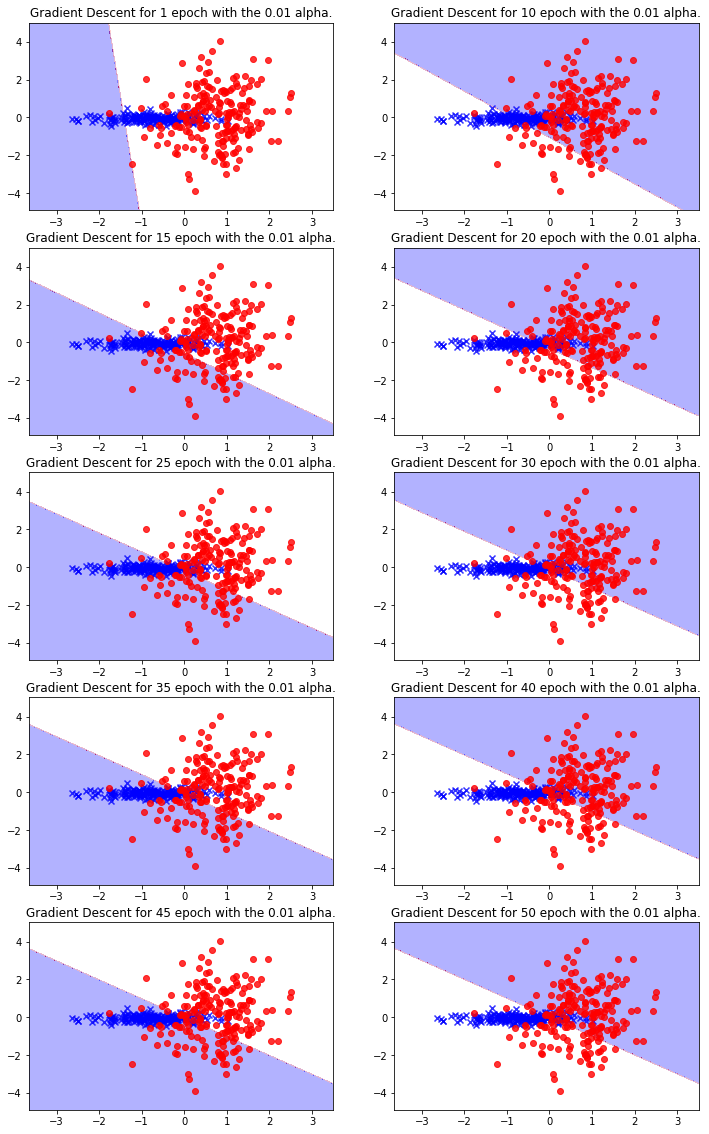

In [17]:
# Visualization of the range of epoch with the same size of alpha.
plt.figure(figsize=(12, 20))
evens = [1, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for i, epoch in enumerate(evens):
    plt.subplot(5,2, i+1)
    Adaptive_Linear_Neuron = stochastic_gradient_descent(alpha=0.01, epochs=epoch)
    Adaptive_Linear_Neuron.train(X_std, y)
    plot_decision_regions(X_std, y, classifier=Adaptive_Linear_Neuron)
    plt.title('Gradient Descent for %d epoch with the 0.01 alpha.' % (epoch))
plt.show()

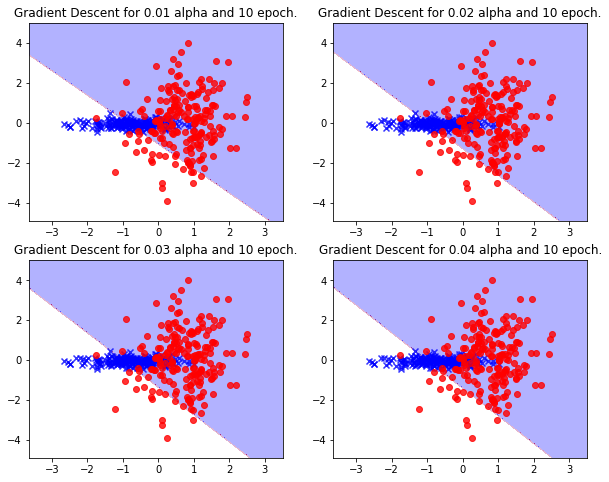

In [18]:
# Visualization of the range of alpha with the same size of epoch.
plt.figure(figsize=(10,8))
for i in range(4):
    alpha_ = (i+1)/100
    plt.subplot(2,2, i+1)
    Adaptive_Linear_Neuron = stochastic_gradient_descent(alpha=alpha_, epochs=10)
    Adaptive_Linear_Neuron.train(X_std, y)
    plot_decision_regions(X_std, y, classifier=Adaptive_Linear_Neuron)
    plt.title('Gradient Descent for %.2f alpha and 10 epoch.' % (alpha_))
plt.show()